## Dependence and Independence

In [2]:
# P(E) Probability of E
# P(E,F) Probability of E independent of F
# P(E|F) Probability of E dependent (conditional) of F


## Conditional Probability

In [6]:
# Independent Events
# P(E, F) = P(E)P(F)
# Conditional Events
# P(E | F) = P(E, F) / P(F)
# When E and F are independent
# P(E | F) = P(E)
# P(B|G) = P(B,G)/P(G) = P(B)/P(G) = 1/2 (Boy, Girl children)
# Programming wise by "generating" a lot of families
import random
# Importing random module
def random_kid():
    return random.choice(["boy", "girl"])
# Iniital Investments
both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(10000): # Run it this many times
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1
print("P(both | older): ", both_girls / older_girl)   # 1/2
print("P(both | either): ", both_girls / either_girl) # 1/3

P(both | older):  0.5007089325501317
P(both | either):  0.3311897106109325


## Baye's Theorem

Bayes' theorem is a formula that describes how to update the probabilities of hypotheses when given evidence. It follows simply from the axioms of conditional probability, but can be used to powerfully reason about a wide range of problems involving belief updates.

Given a hypothesis  and evidence , Bayes' theorem states that the relationship between the probability of the hypothesis before getting the evidence  and the probability of the hypothesis after getting the evidence  is


Many modern machine learning techniques rely on Bayes' theorem. For instance, spam filters use Bayesian updating to determine whether an email is real or spam, given the words in the email. Additionally, many specific techniques in statistics, such as calculating -values or interpreting medical results, are best described in terms of how they contribute to updating hypotheses using Bayes' theorem.


## Random Variables

A random variable is a variable whose possible values have an associated probability distribution

We'll use these random variables implicitly in what we do without calling special attention to them.

## Continuous Distributions

In [9]:
# Discrete Distribution - positive probability with discrete outcomes. 

# Density function for the uniform distribution

def uniform_pdf(x): # pdf = probability distribution function
    return 1 if x >= 0 and x < 1 else 0

# random.random = pseudo random variable with a uniform density

# Often interested in a cumulative distribution function (cdf)
# Probability that a random variable is less than or equal to a certain value

def uniform_cdf(x):
    "Returns the probablity that a uniform variable is <= x"
    if x < 0: return 0   # uniform random is never less than 0
    elif x < 1: return x  # e.g. P(X <= 0.4) = 0.4
    else: return 1        # Uniform random is always less than 1

## The Normal Distribution

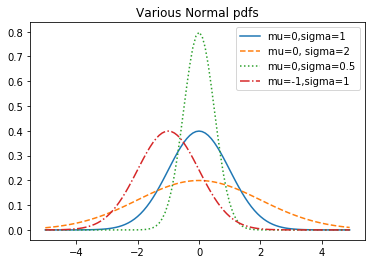

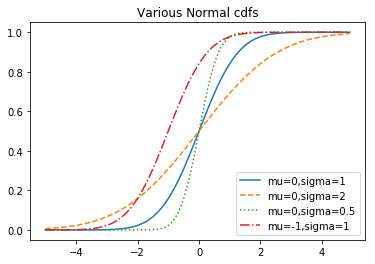

In [15]:
# King of distributions
# Classical bell curve-shaped distribution
# Determined by mean (mu) and standard deviation (sigma)
# Probability density function as 
# f(x | (mu), (sigma) = (1 / sqrt(2pi(sigma))) exp ( - ((x - mu)^2 / (2(sigma)^2)))
# Python as
import math
def normal_pdf(x, mu = 0, sigma = 1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))
from matplotlib import pyplot as plt
# example plotting
xs = [x / 10.0 for x in range(-50, 50)] # List comprehension, x range -50 to 50 (so -5, 5)
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs], '-',label='mu=0,sigma=1') # Standard normal distribution
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs], '--',label='mu=0, sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs], ':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs], '-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

# Cumulative Distribution Function cannot be written in an elementary manner, uses math.erf (error function)
def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2
# Plotting
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs], '-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs], '--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs], '-.',label='mu=-1,sigma=1')
plt.legend(loc=4) # bottom right legend placement
plt.title("Various Normal cdfs")
plt.show()

# Sometimes we'll need to invert the normal_cdf to find the value corresponding to a specified probability
# Using a binary search algorithm
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find approximate inverse using binary search"""
    
    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance = tolerance)
    
    low_z = -10.0                                 # normal_cdf(-10) is (very close to) 0
    hi_z = 10.0                                   # normal_cdf(10) is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2                # consider the midpoint
        mid_p = normal_cdf(mid_z)                 # and the cdf's value there
        if mid_p < p:
            # midpoint is still to low, search above it
            low_z = mid_z
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z = mid_z
        else:
            break
        
    return mid_z
# Bisects intervals until it narrows in on a Z that's close enough to the desired probability

## The Central Limit Theorem

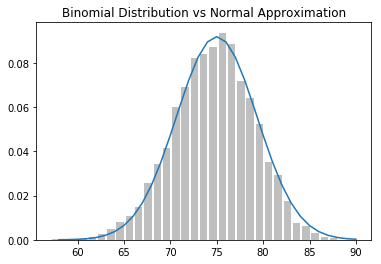

In [18]:
# In essence, a random variable defined as the average of a large number of independent and identically distributed
# random variable is itself normally distributed
# (1 / n)(x_1 + ... + x_n)
# Approximately normally distributed with mean mu and standard dev sigma / (sqrt(n))
# ((x_1 + ... + x_n) - mu(n)) / (sigma) / (sqrt(n))
# Normally distributed with mean 0 and standard deviation 1
# Look at binomial random variables with 2 params n and p
# Binomial(n, p) random variable is the sum of n independent Bernoulli(p) random variables
# each of which = 1 with probability p and 0 with probability  1 - p

from collections import Counter
def bernoulli_trial(p):
    return 1 if random.random() < p else 0
def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n)) # Add sums

def make_hist(p, n, num_points): # This makes the histogram, statistical average, number of points called
    
    data = [binomial(n, p) for _ in range(num_points)] # Run binomial this many times for data points
    
    # use a bar chart to show the actual binomial samples
    histogram = Counter(data) # Counts key and value points
    plt.bar([x - 0.4 for x in histogram.keys()],
           [v / num_points for v in histogram.values()],
           0.8, # max y
           color='0.75') # grey scale
    
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    
    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
         for i in xs]
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs Normal Approximation")
    plt.show()
make_hist(0.75, 100, 10000)